In [51]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [53]:
def generate_data(index_saham,start,end):
    data_all = pandas_datareader.data.DataReader(index_saham,'yahoo',start,end)
    data_all.reset_index(inplace=True)
    x_all = pd.DataFrame(data_all.Date.astype(str).str.split('-').tolist(),columns="year month date".split())
    y_all = data_all.Close
    return x_all, y_all, data_all
start_date = dt.datetime(2014, 8, 21)
end_date = dt.datetime.now()
x_all, y_all, data_all = generate_data('NFLX', start_date, end_date)


In [54]:
data_all

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-08-20,67.678574,66.362854,66.714287,67.455711,12163900.0,67.455711
1,2014-08-21,68.021431,66.809998,67.325714,67.435715,11746700.0,67.435715
2,2014-08-22,68.507141,67.150002,67.277145,68.455711,13735400.0,68.455711
3,2014-08-25,69.328575,68.218575,68.792854,68.704285,13484800.0,68.704285
4,2014-08-26,68.835716,67.792854,68.357140,68.480003,10137400.0,68.480003
...,...,...,...,...,...,...,...
1348,2019-12-27,333.820007,326.010010,332.959991,329.089996,5036100.0,329.089996
1349,2019-12-30,329.190002,322.859985,329.079987,323.309998,4311500.0,323.309998
1350,2019-12-31,324.920013,321.089996,322.000000,323.570007,3713300.0,323.570007
1351,2020-01-02,329.980011,324.779999,326.100006,329.809998,4485800.0,329.809998


In [55]:
x_all

,year,month,date
0,2014,08,20
1,2014,08,21
2,2014,08,22
3,2014,08,25
4,2014,08,26
...,...,...,...
1348,2019,12,27
1349,2019,12,30
1350,2019,12,31
1351,2020,01,02


In [56]:
def tranformasi_data(x_all,x_tr):
    scaler = StandardScaler()
    scaler.fit(x_all)
    x_all_tr = scaler.transform(x_tr)
    return x_all_tr

x_all_tr = tranformasi_data(x_all, x_all)

In [57]:
x_all_tr

array([[-1.78626268,  0.35046643,  0.48340706],
       [-1.78626268,  0.35046643,  0.59757179],
       [-1.78626268,  0.35046643,  0.71173652],
       ...,
       [ 1.40635741,  1.50841777,  1.73921911],
       [ 2.04488143, -1.67594843, -1.57155812],
       [ 2.04488143, -1.67594843, -1.45739339]])

In [58]:
def model(x_all_tr, y_all):
    gcs = GridSearchCV(SVR(kernel='rbf'),param_grid={'gamma': [5, 6, 7, 8, 9, 10]},cv=5,scoring='neg_mean_squared_error')
    grid_result = gcs.fit(x_all_tr, y_all)
    best_params = grid_result.best_params_
    best_svr = SVR(kernel='rbf', C=1e3, gamma=best_params["gamma"])
    best_svr.fit(x_all_tr, y_all)
    y_pred = best_svr.predict(x_all_tr)
    return y_pred, best_svr

y_pred, best_svr = model(x_all_tr, y_all)

/home/rama/.local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


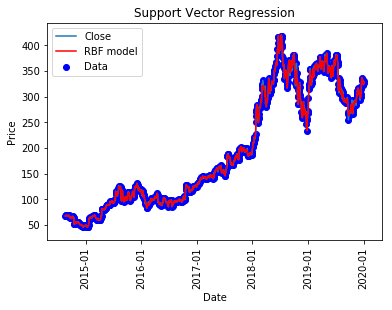

In [59]:
def plot(y_pred, data_all):
    fig, ax1 = plt.subplots()
    plt.plot(data_all.Date, data_all.Close)
    monthyearFmt = mdates.DateFormatter('%Y-%m')
    ax1.xaxis.set_major_formatter(monthyearFmt)
    _ = plt.xticks(rotation=90)
    
    plt.plot(data_all.Date, y_pred, c='r', label='RBF model')
    plt.scatter(data_all.Date, data_all.Close, c='b', label='Data')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
plot(y_pred, data_all)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MSE: {0:.3f}'.format(mean_squared_error(y_all, y_pred)))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_all, y_pred)))
print('R^2: {0:.3f}'.format(r2_score(y_all, y_pred)))

MSE: 5.674
MAE: 0.936
R^2: 1.000


In [61]:
prediksi_tanggal = '2020-01-04'
y, m, d = prediksi_tanggal.split('-')
c = [[y, m, d]]
c_tr = tranformasi_data(x_all, c)
best_svr.predict(c_tr)

array([308.00838402])